(48842, 317)
Number of features for 95% importance: 13
Feature Ranking For Non-Discretised: [1 1 1 1 1 1 3 1 1 1 1 1 1 1 2 1]
Optimal number of features: 14
14
[1 1 1 1 1 1 3 1 1 1 1 1 1 1 2 1]
[ True  True  True  True  True  True False  True  True  True  True  True
  True  True False  True]
1
LogisticRegression()
(34189, 14)
(34189,)
(14653, 14)
(14653,)
KNN score:  0.2942147975383944
Logistic Regression score:  0.8354603152937965
Decision Tree score:  0.4431524680905735
Random Forest score:  0.4644804189367896
Naive Bayes score:  0.7857094110421075
Linear SVC score:  0.7612093086739917
Gradient Boosting score:  0.8637821606496963
Stochastic Gradient Descent score:  0.8200368525216679
RandomizedSearchCV took 3.74 seconds for 10 canditates parameter settings.
Model with rank: 1
Mean validation score: 0.835 (std: 0.004)
Parameter: {'penalty': 'l2', 'intercept_scaling': 1.929872212198749e-05, 'class_weight': None, 'C': 0.050800804157864886}

Model with rank: 2
Mean validation score: 0.83

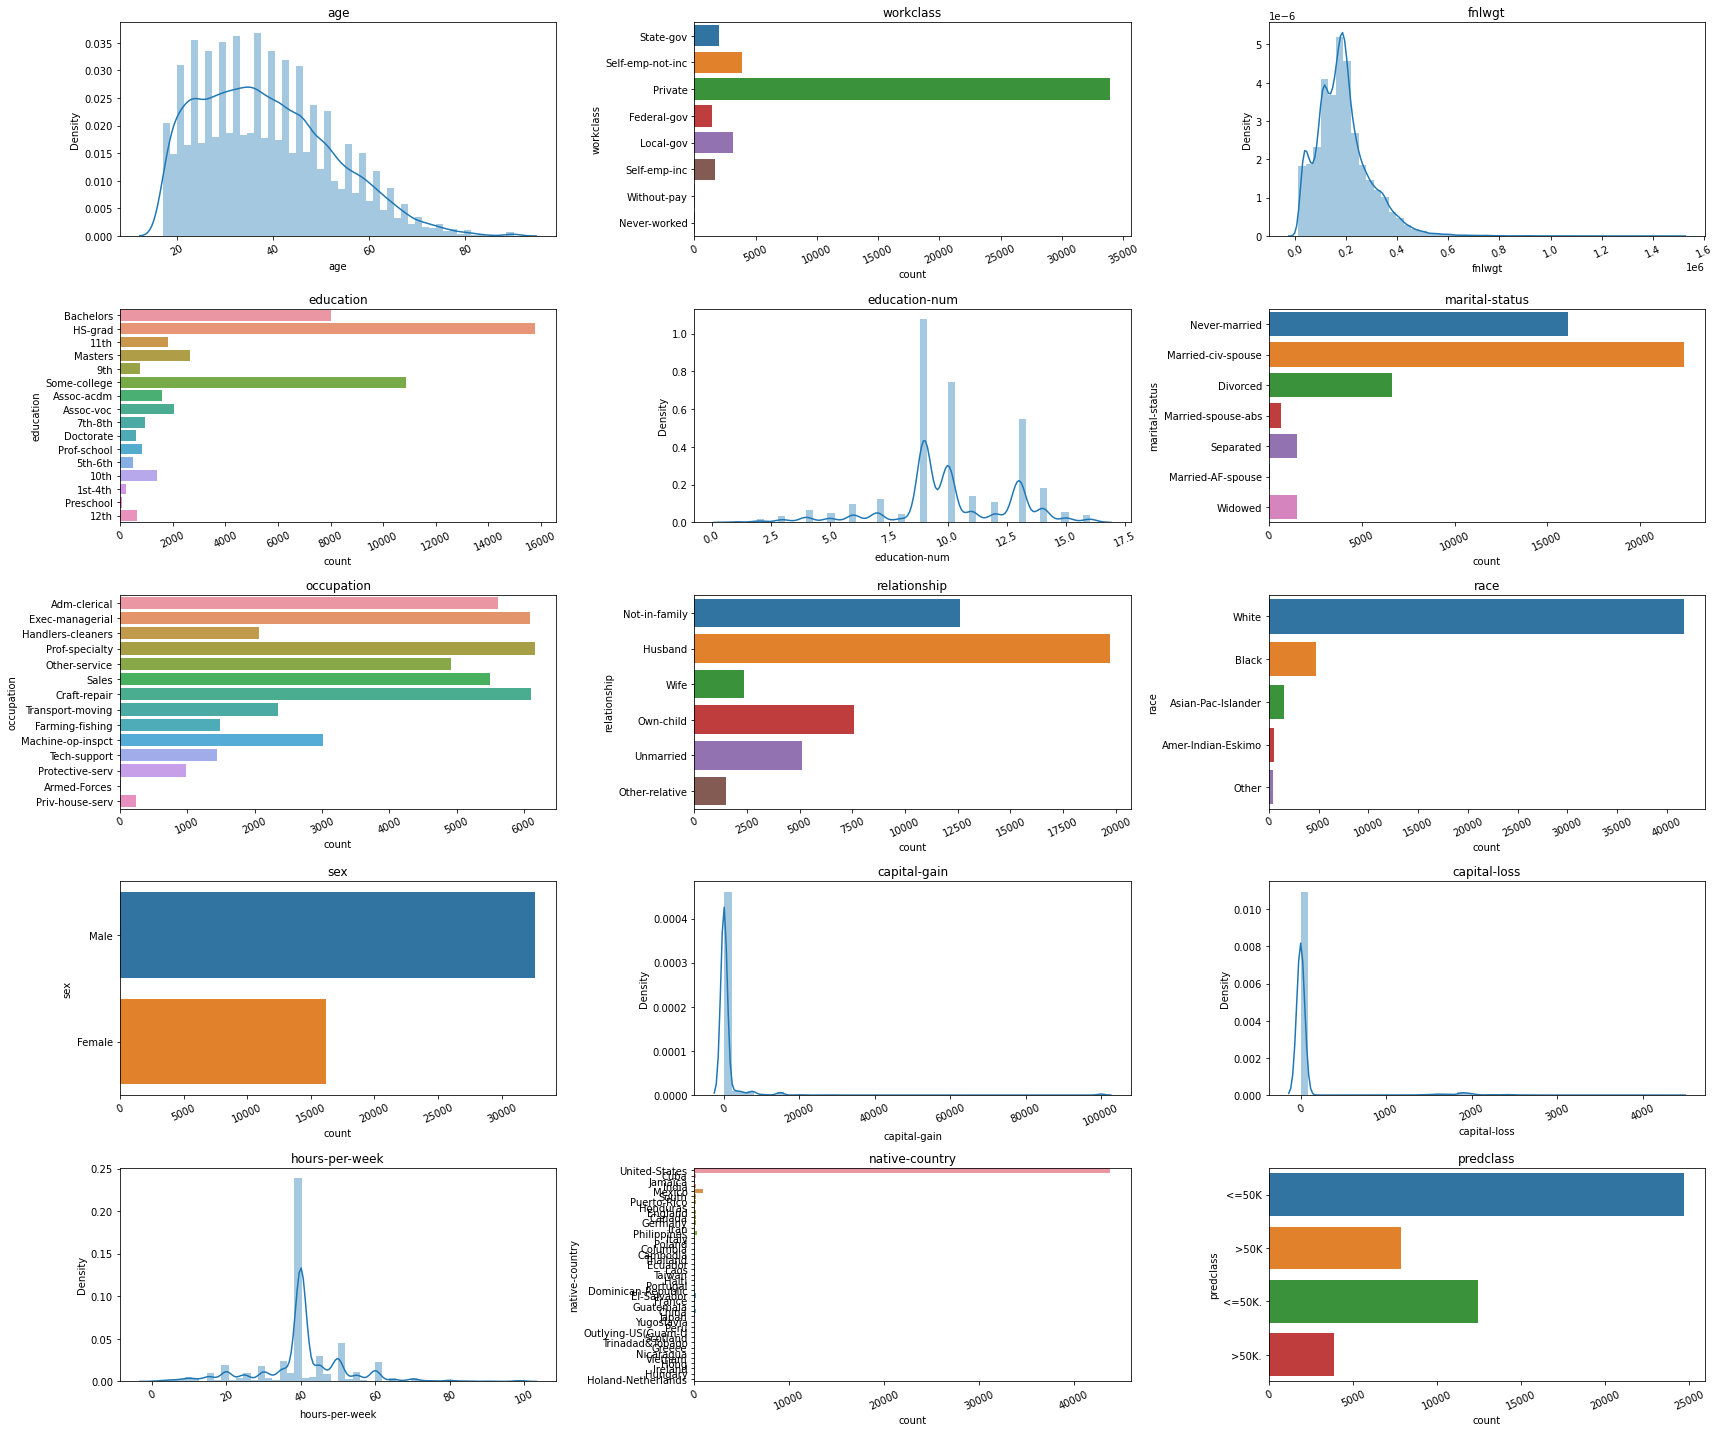

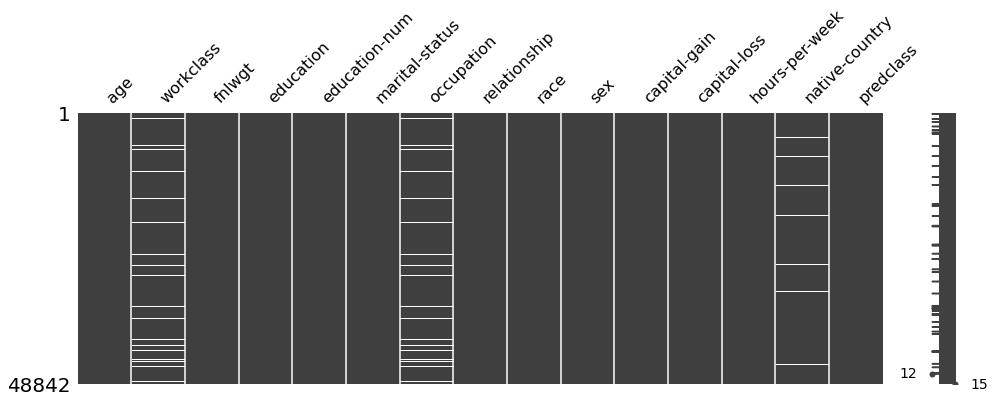

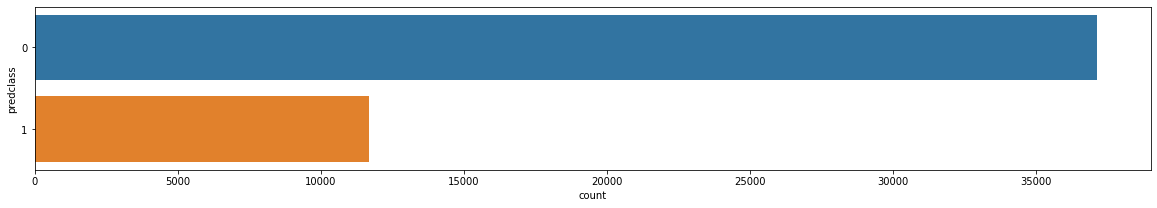

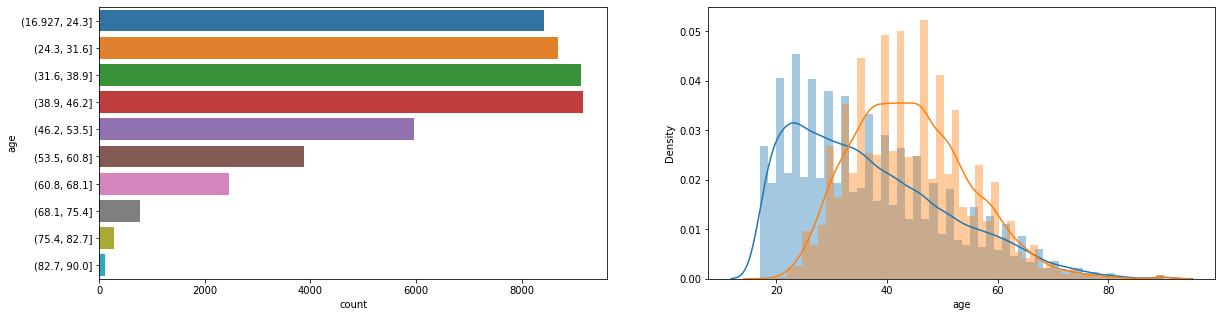

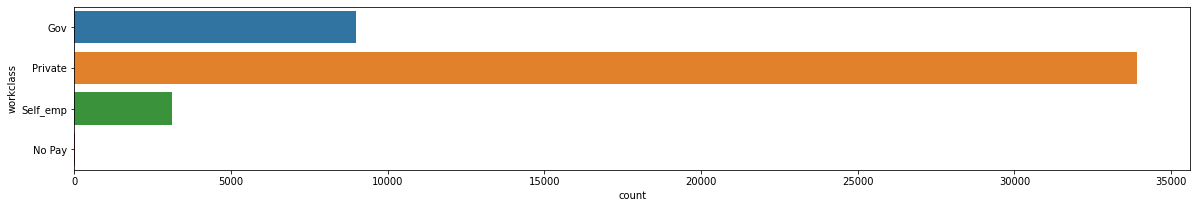

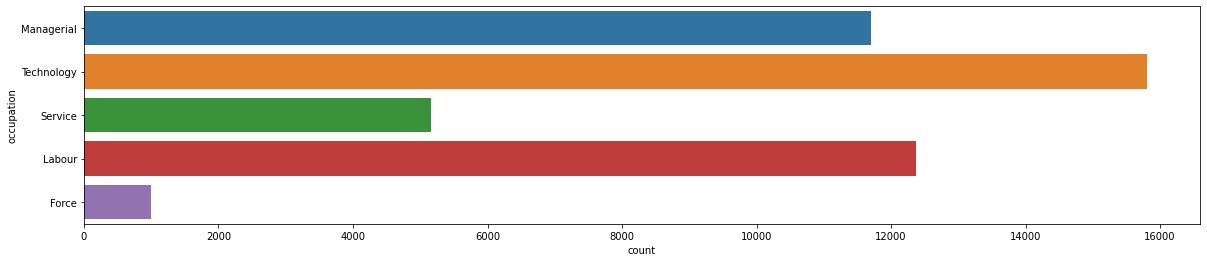

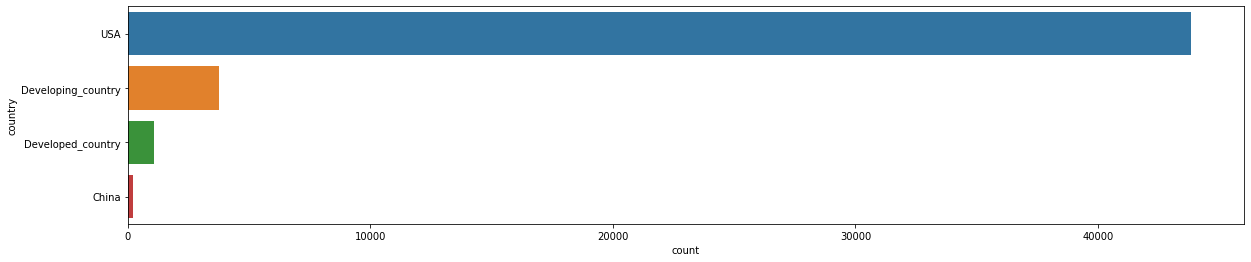

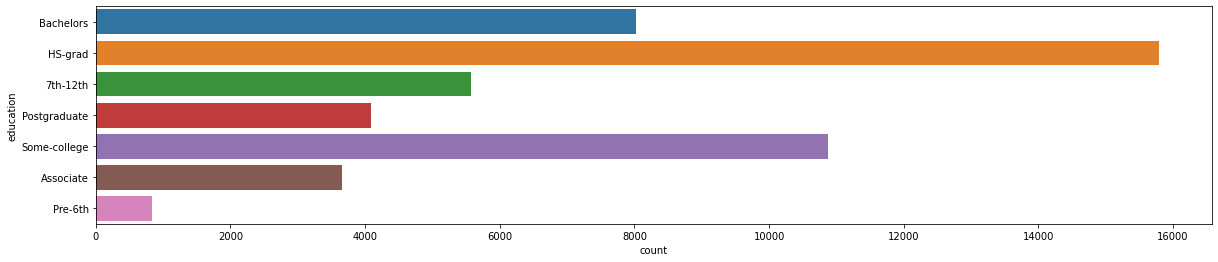

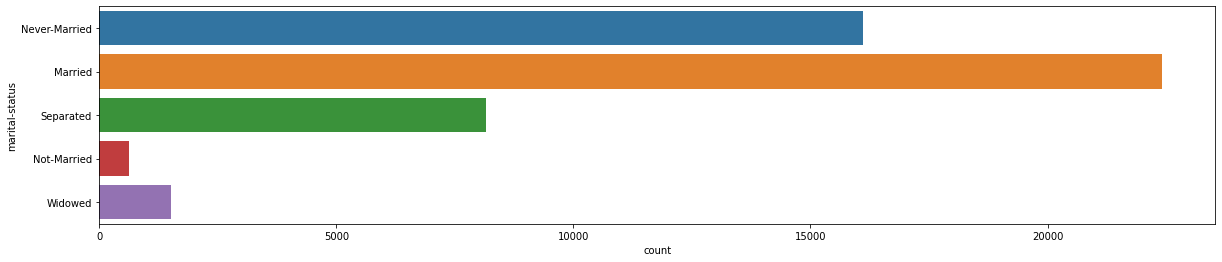

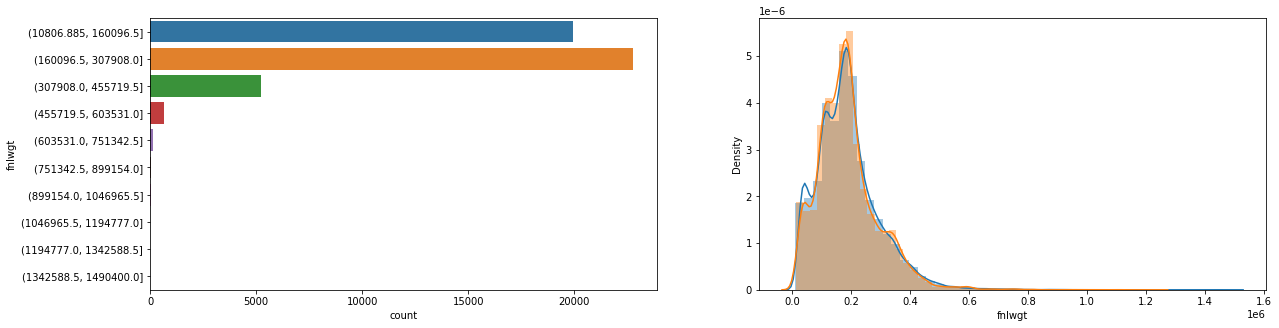

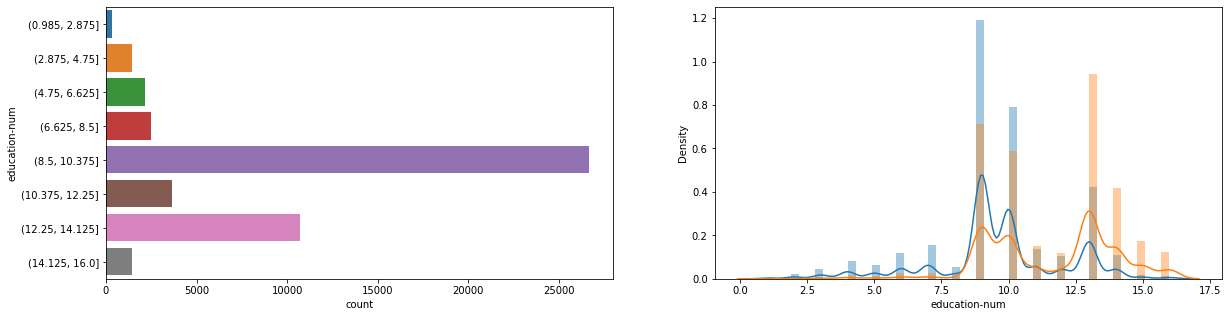

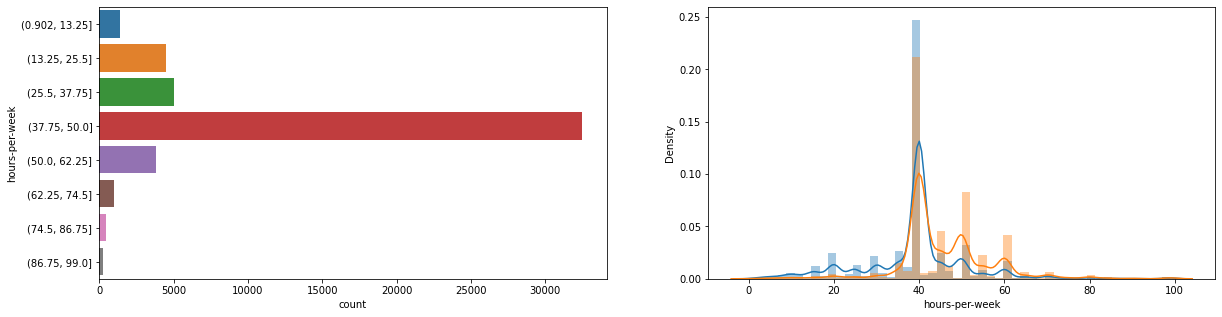

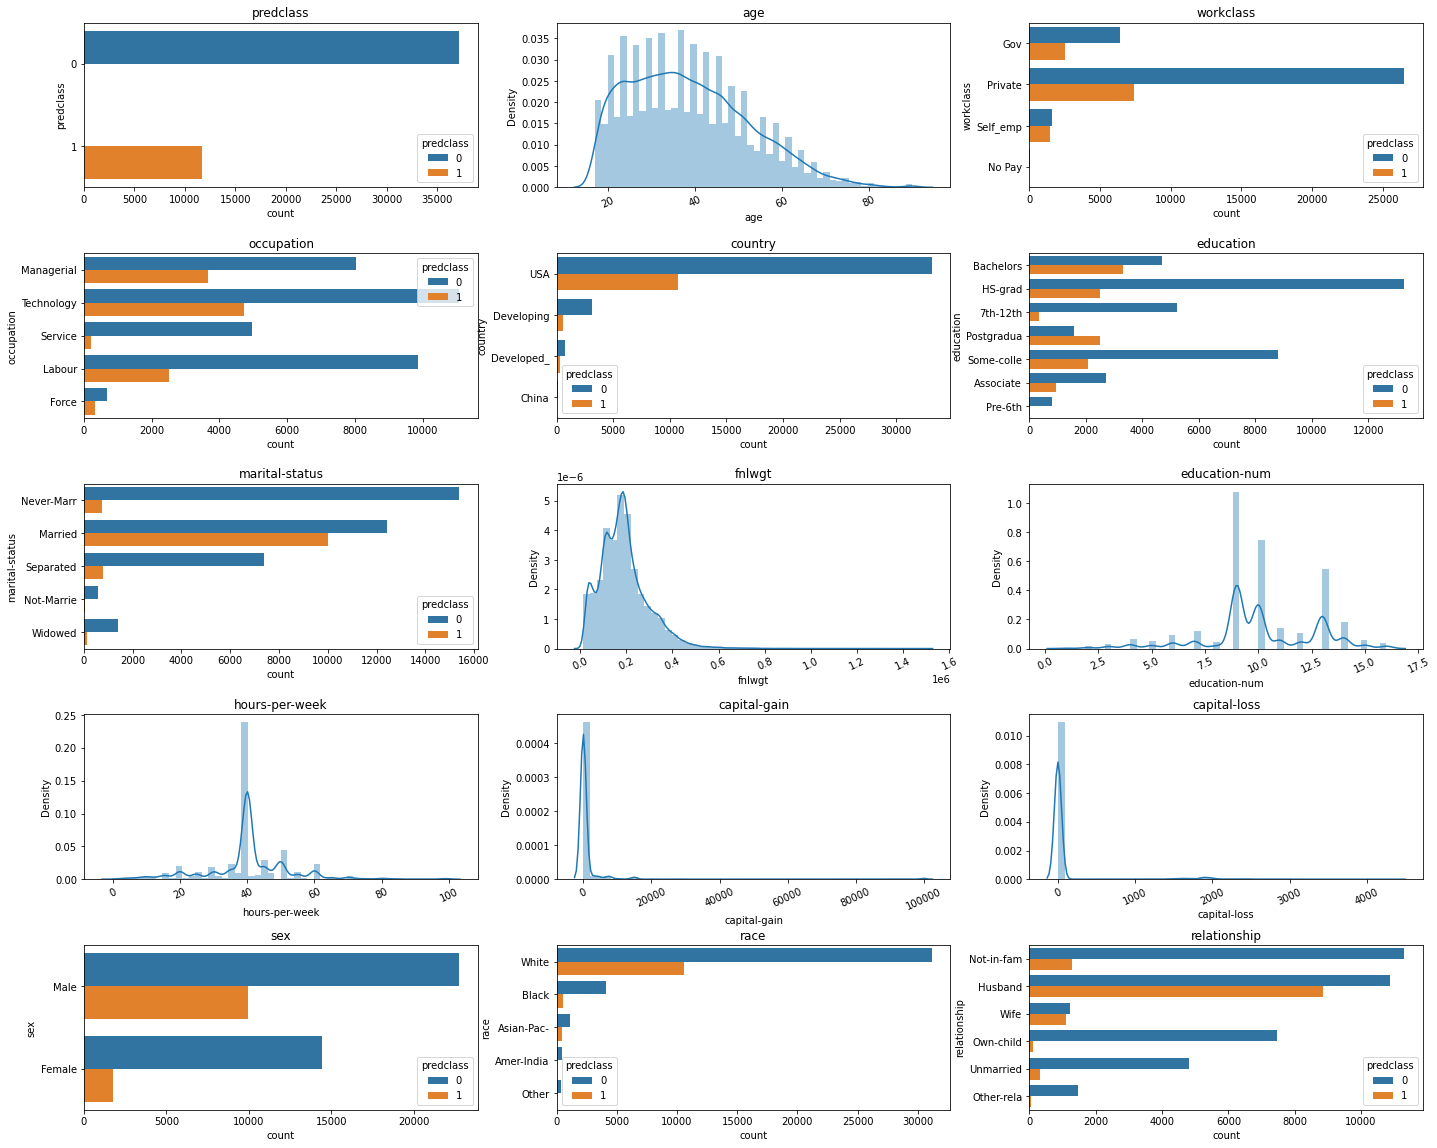

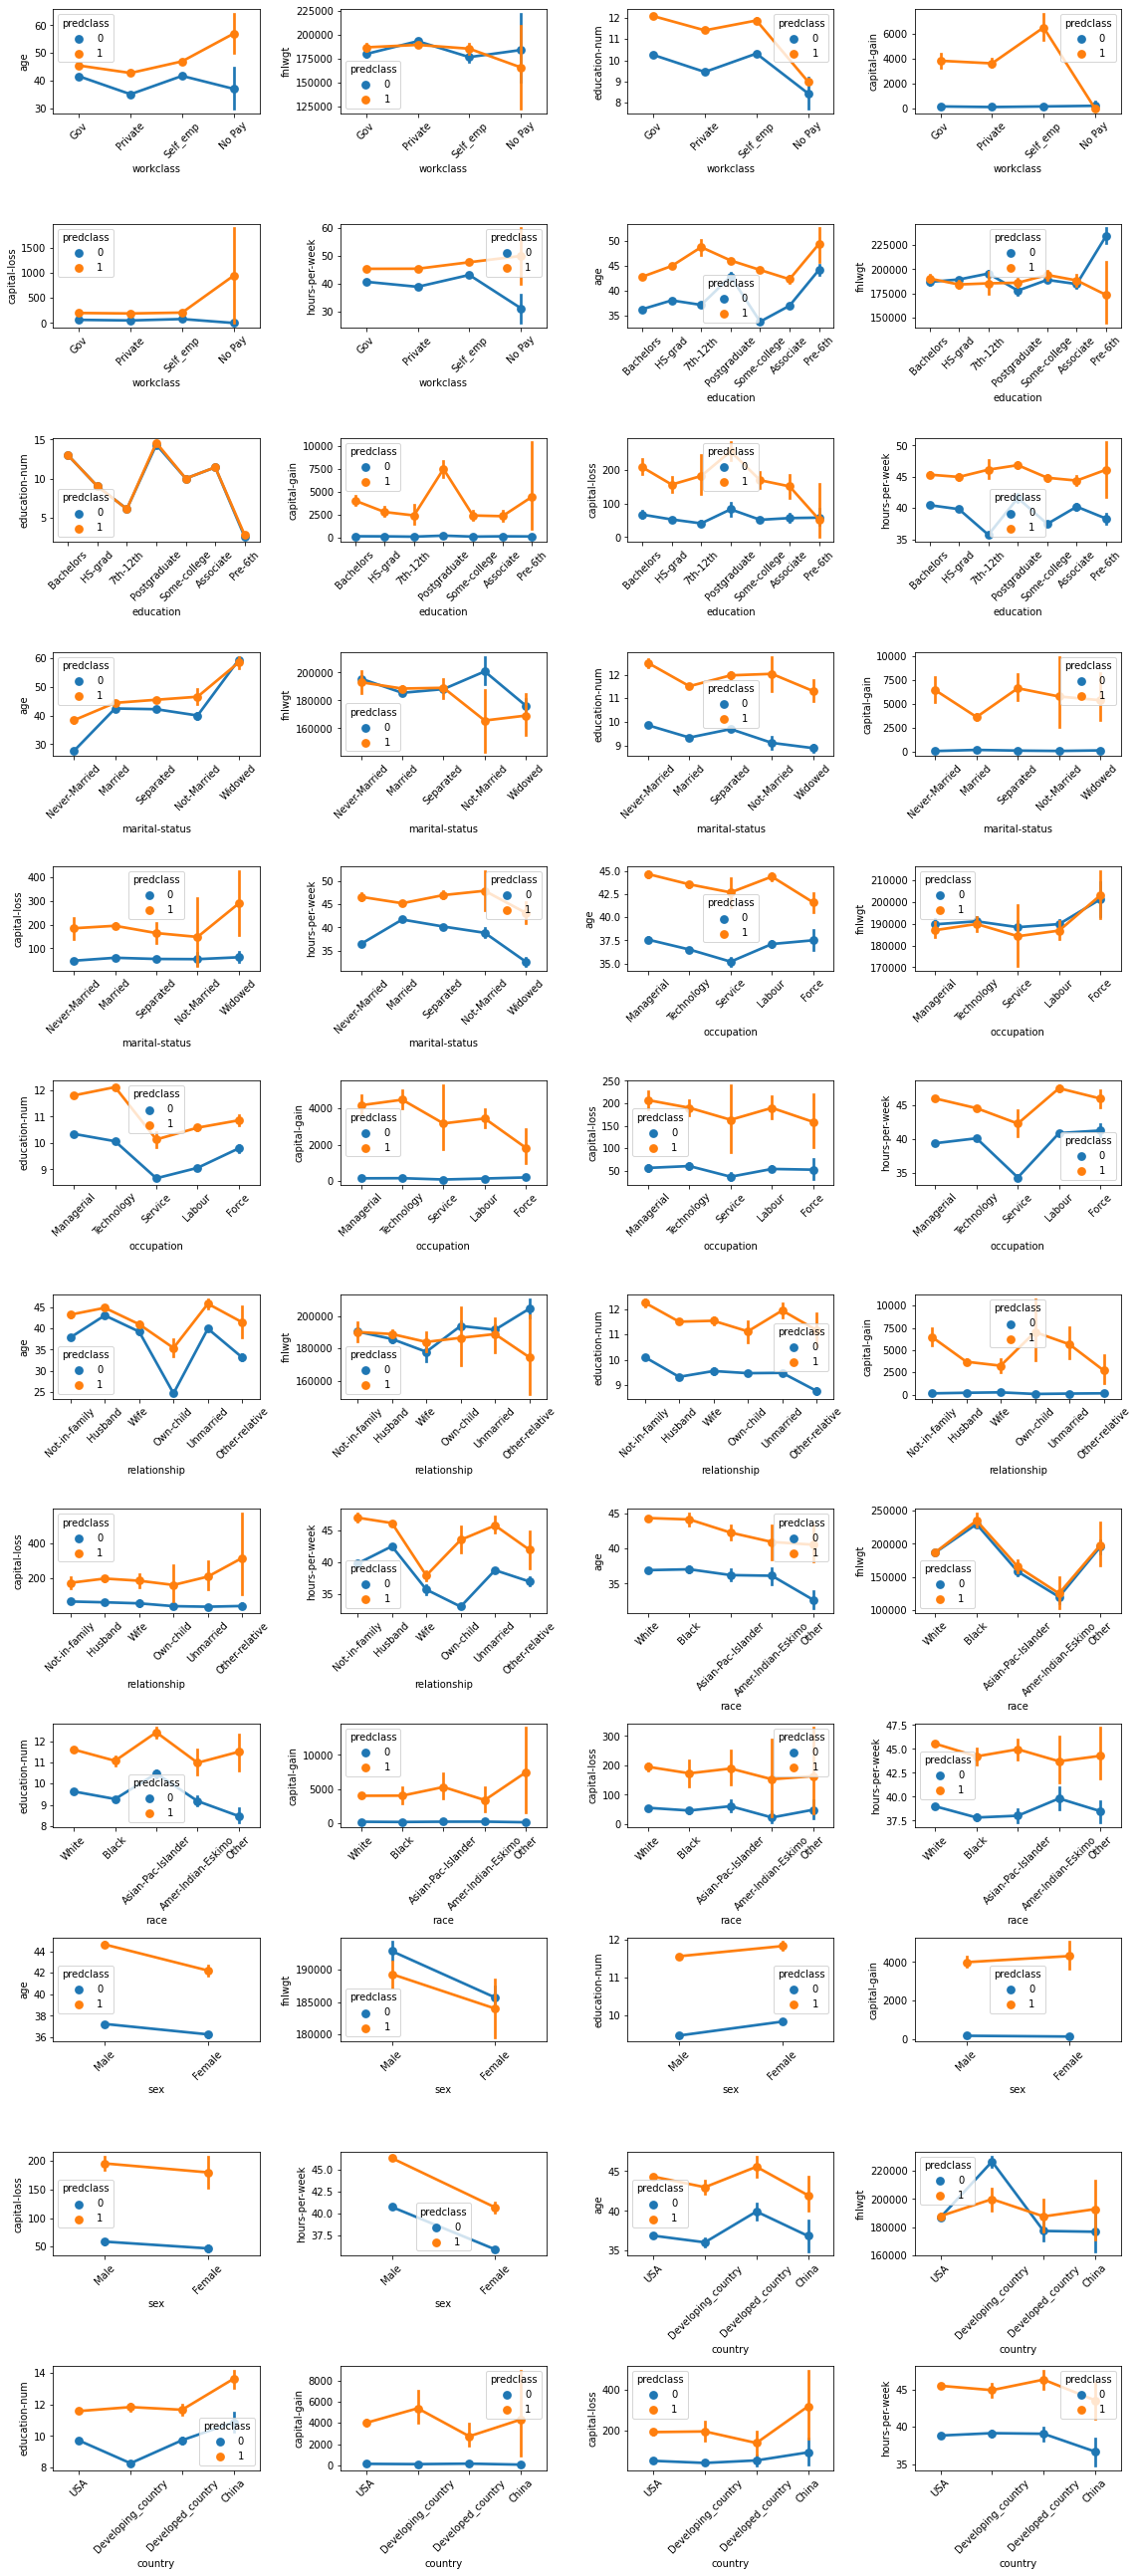

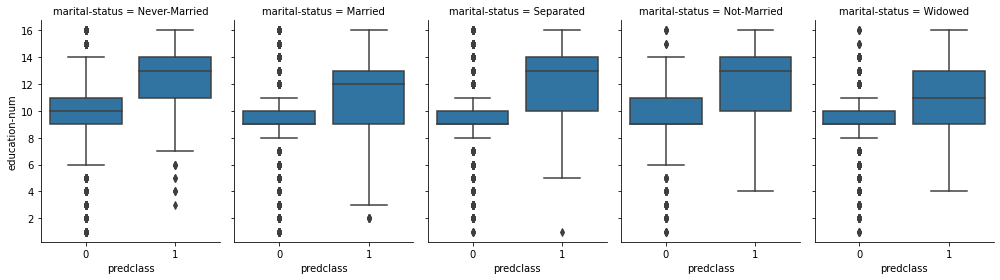

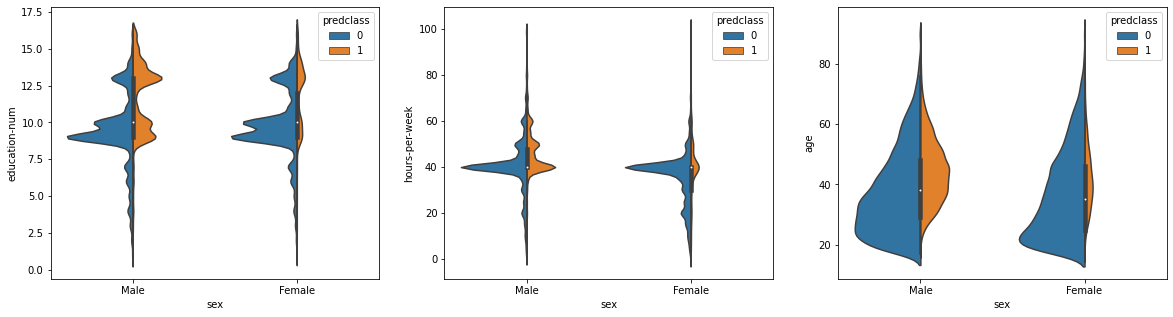

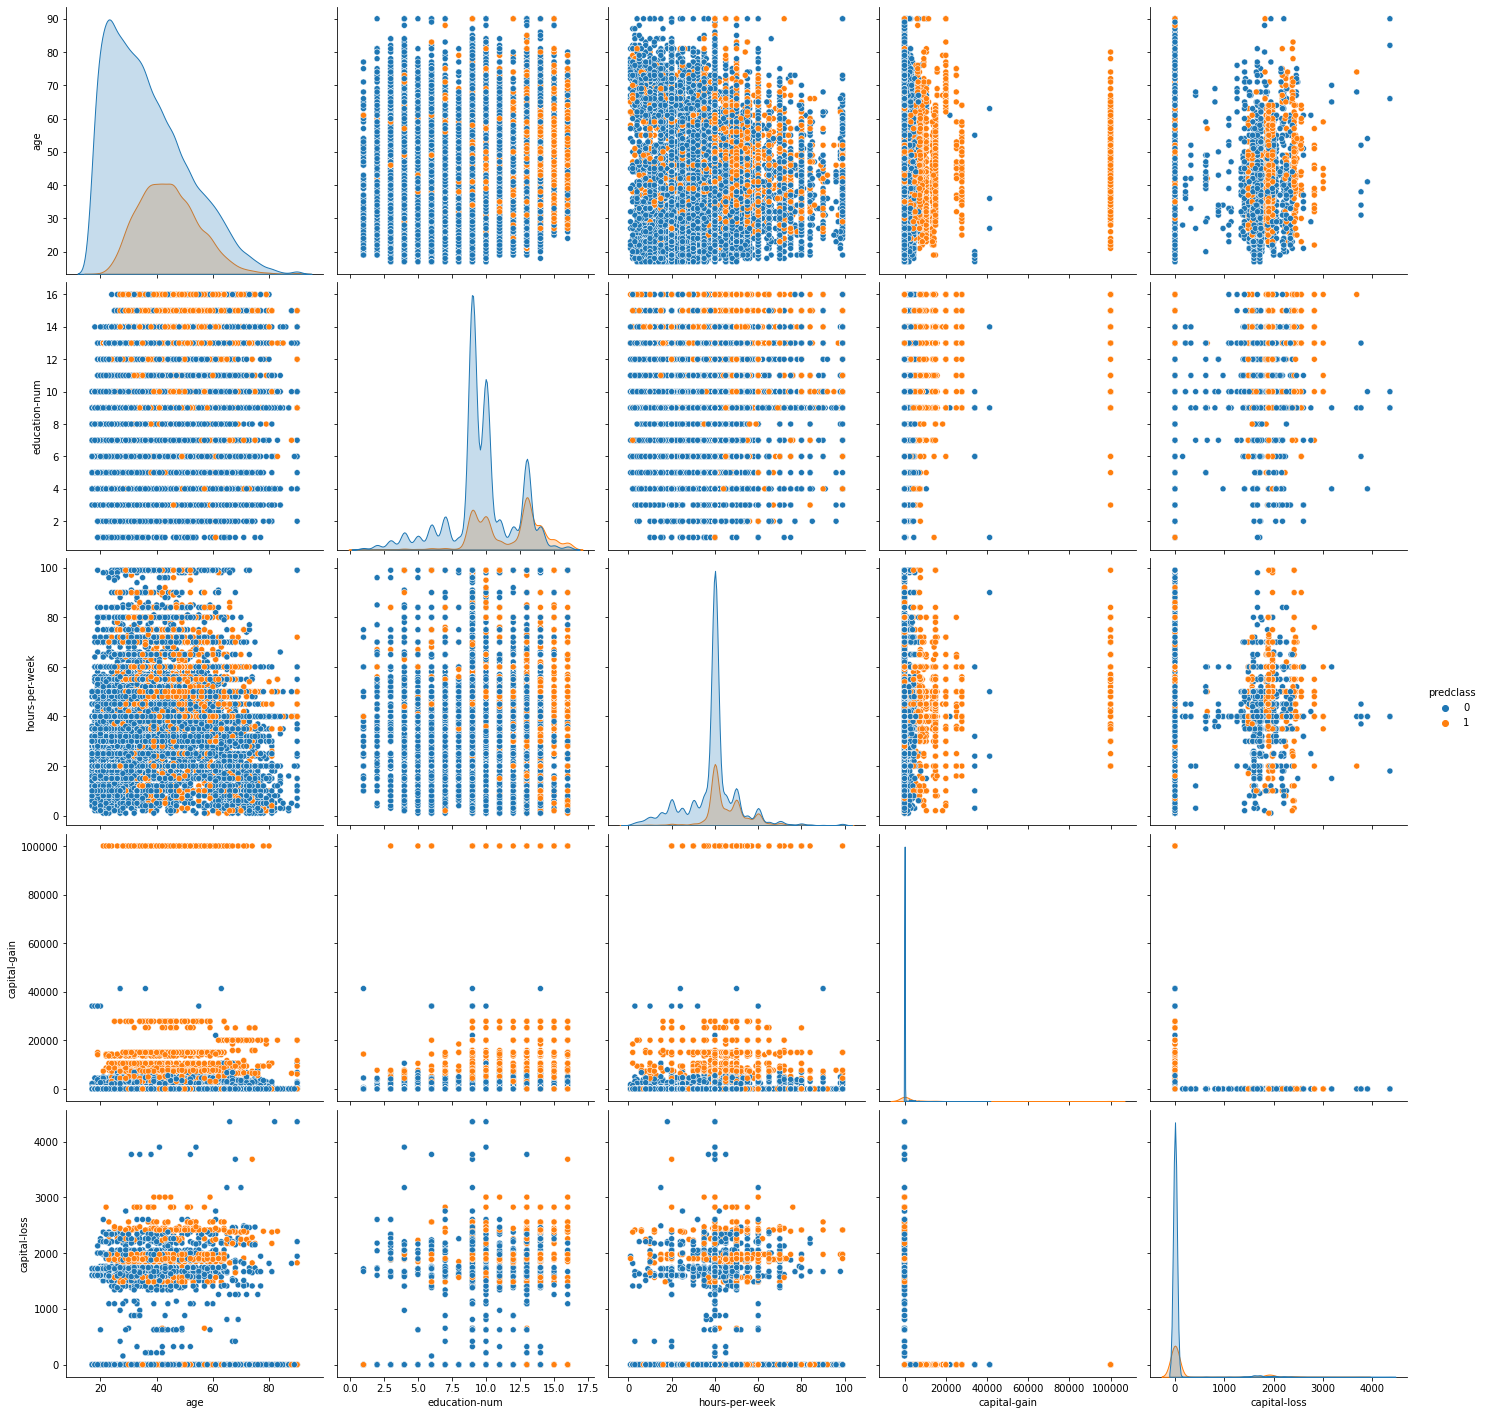

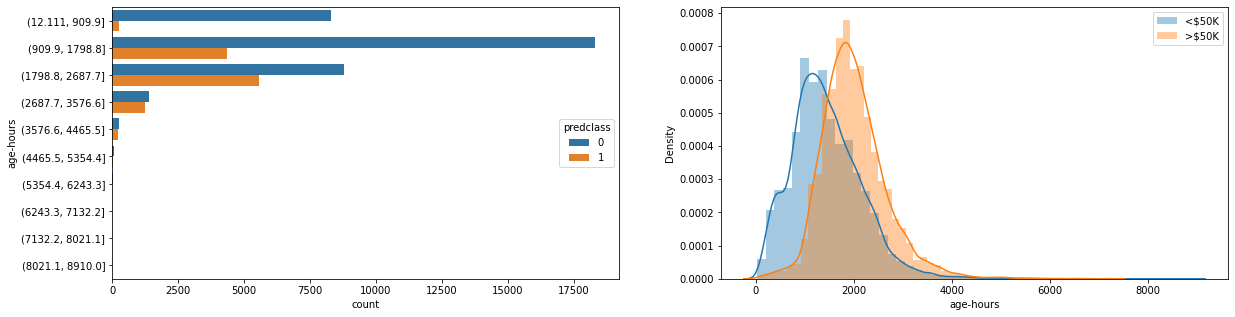

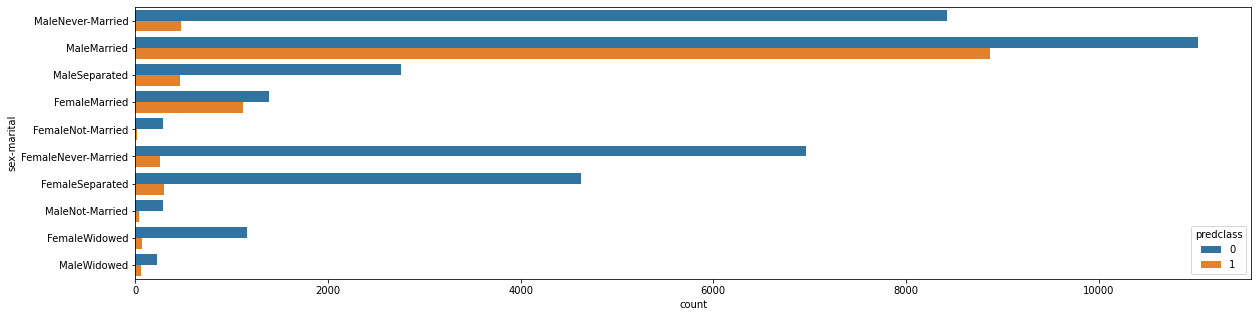

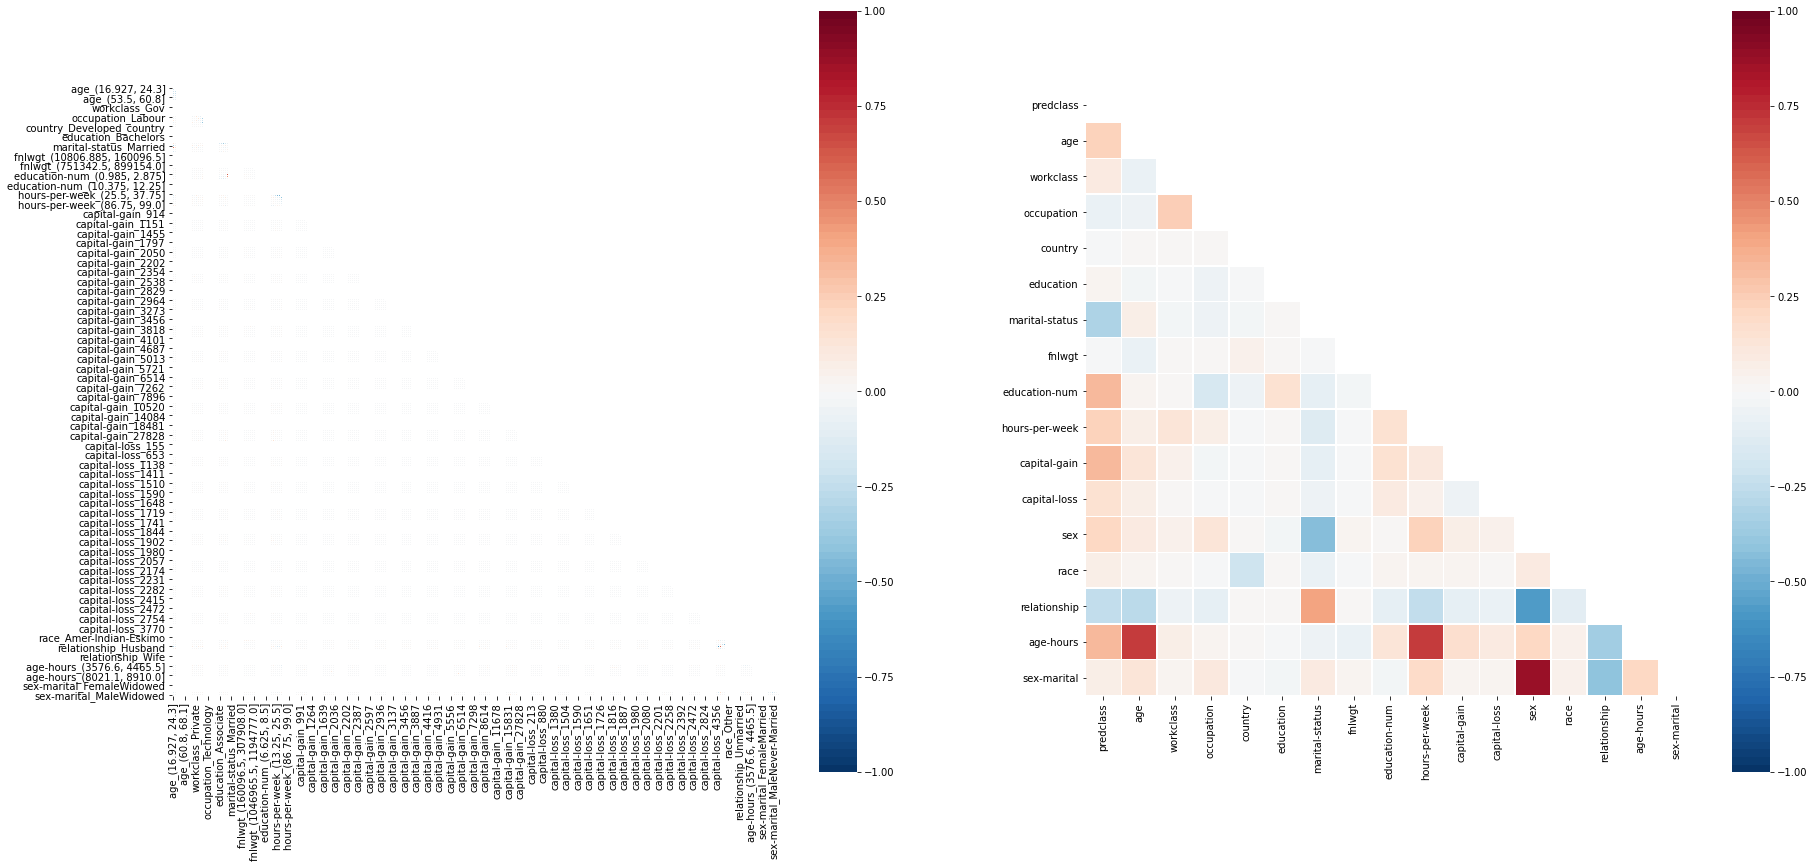

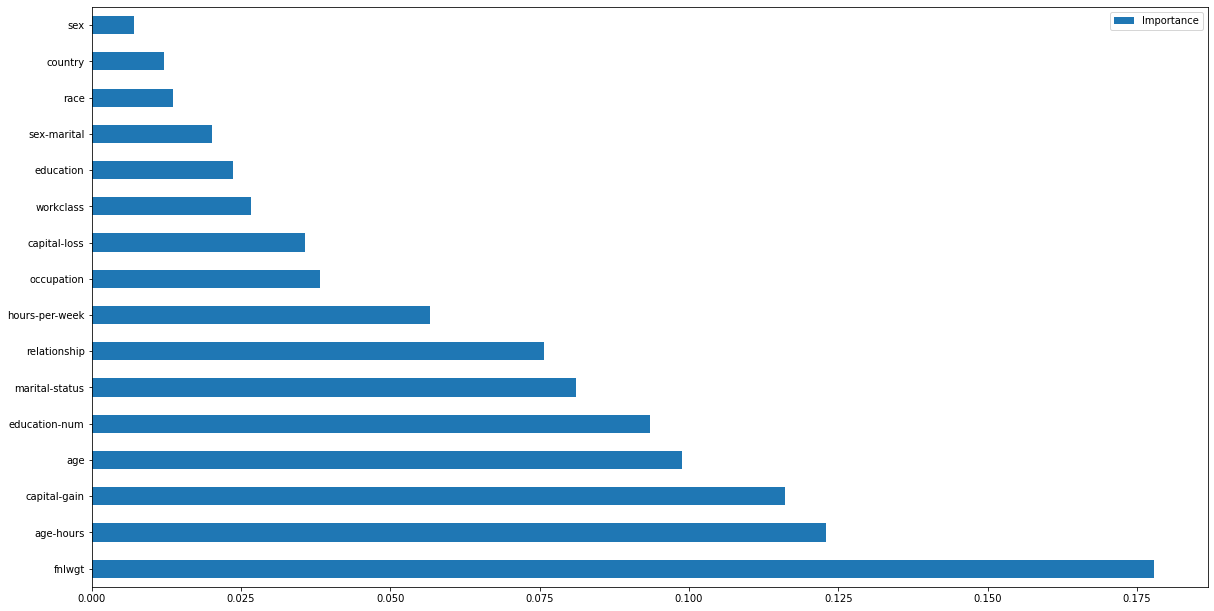

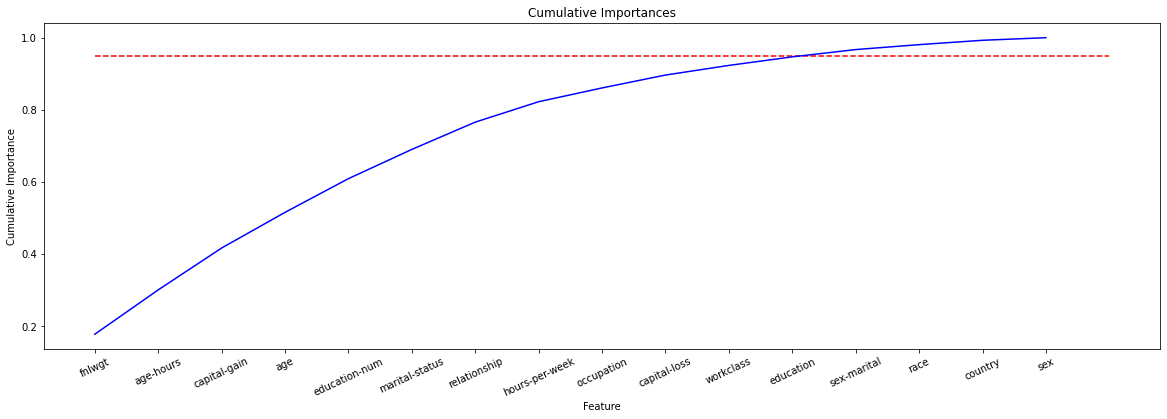

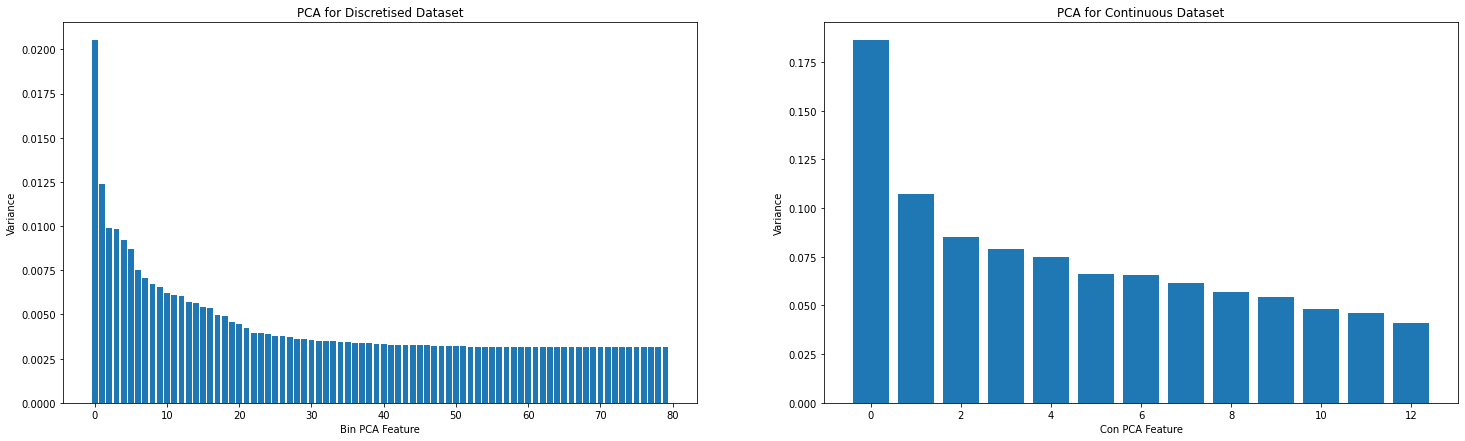

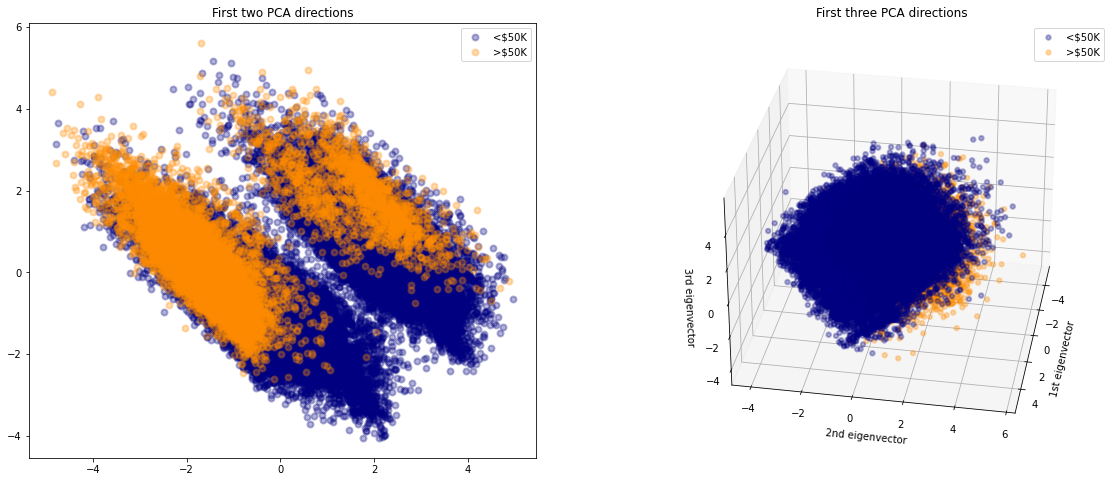

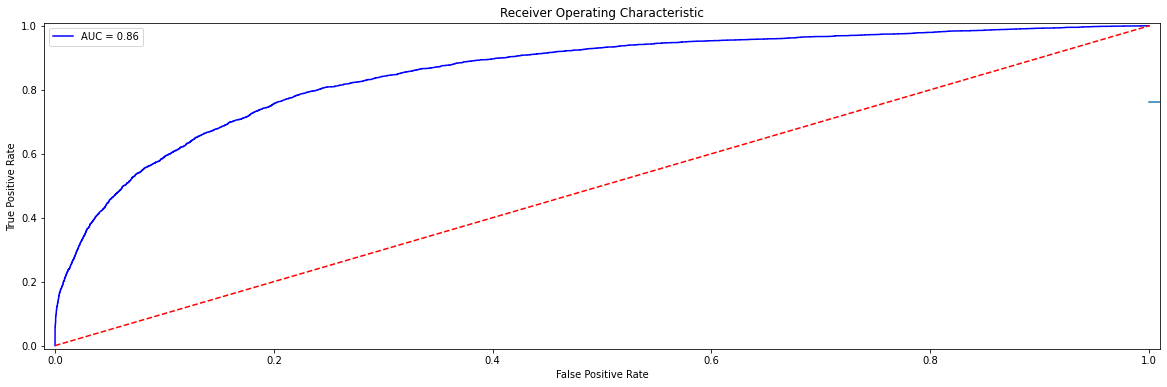

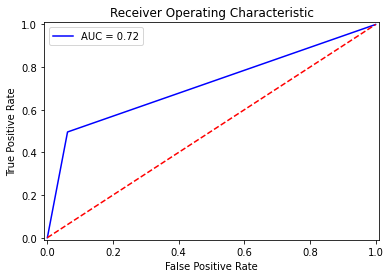

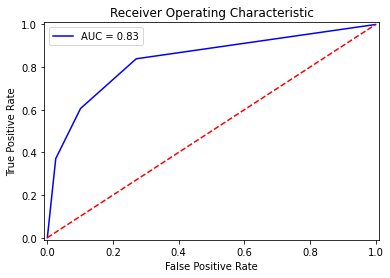

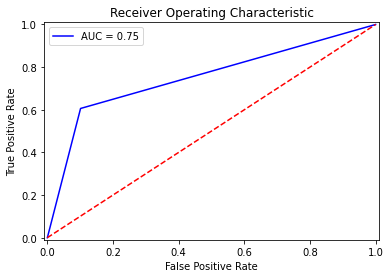

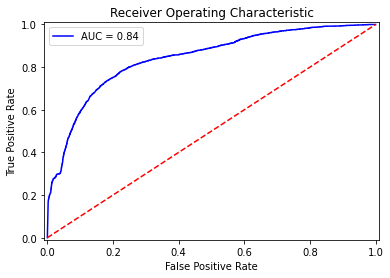

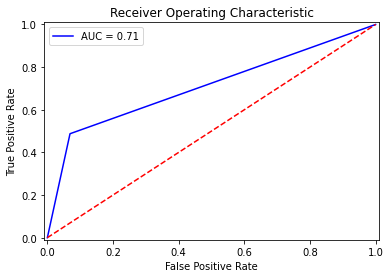

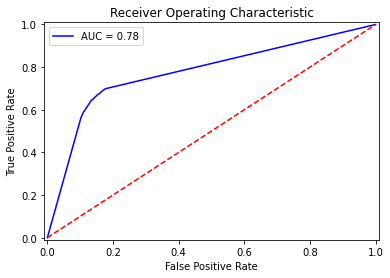

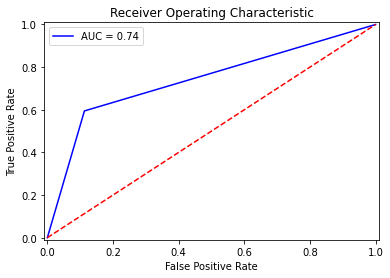

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   33.2s finished


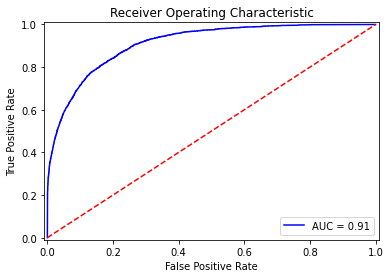

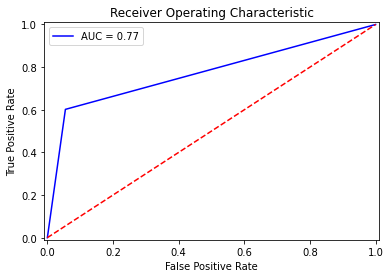

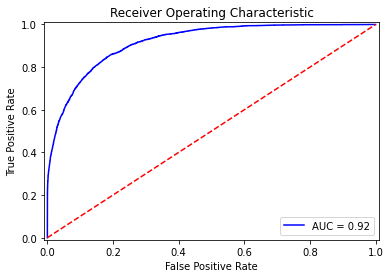

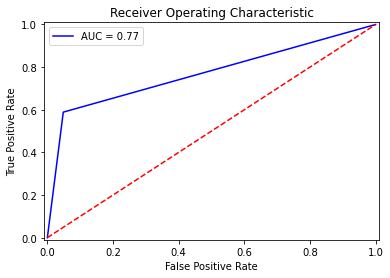

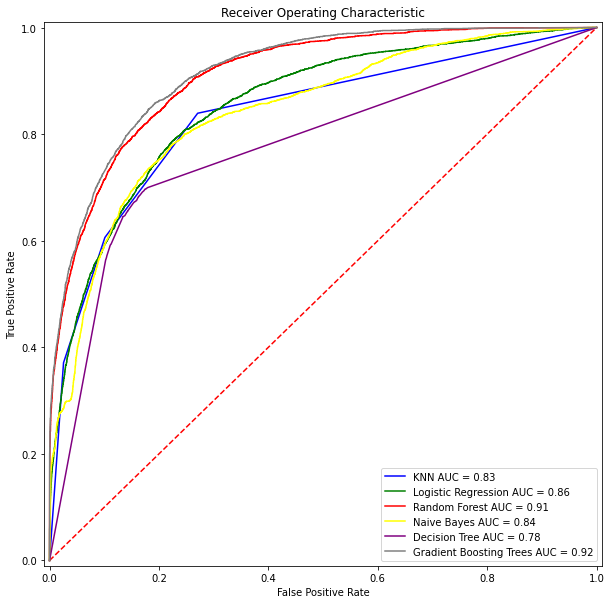

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

# Feature Selection and Encoding
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Machine learning
from sklearn import model_selection, preprocessing, metrics
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Grid and Random Search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Managing Warnings
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline
# Load Training and Test Data Sets
headers = ['age', 'workclass', 'fnlwgt',
           'education', 'education-num',
           'marital-status', 'occupation',
           'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country',
           'predclass']
training_raw = pd.read_csv('E:/Python/project-1/dataset/adult.data',
                       header=None,
                       names=headers,
                       sep=',\s',
                       na_values=["?"],
                       engine='python')
test_raw = pd.read_csv('E:/Python/project-1/dataset/adult.test',
                      header=None,
                      names=headers,
                      sep=',\s',
                      na_values=["?"],
                      engine='python',
                      skiprows=1)
# Join Datasets
dataset_raw = training_raw.append(test_raw)
dataset_raw.reset_index(inplace=True)
dataset_raw.drop('index',inplace=True,axis=1)
dataset_raw.head()

import math
def plot_distribution(dataset, cols, width, height, hspace, wspace):
    fig = plt.figure(figsize = (width, height))
    fig.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=wspace,hspace=hspace)
    rows = math.ceil(dataset.shape[1] / cols)
    for i,column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels = substrings)
            plt.xticks(rotation = 25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation = 25)
    plt.tight_layout()
plot_distribution(dataset_raw, cols=3, width=24, height=20, hspace=0.2, wspace=0.5)

# 查看缺失值
import missingno as msno
msno.matrix(dataset_raw, figsize=(16, 5))

# msno.bar(dataset_raw, sort='ascending', figsize=(16,5))

# 创建两个新的数据集
dataset_bin = pd.DataFrame() # 创建离散值数据集
dataset_con = pd.DataFrame() # 创建连续值数据集

# 标签predclass转换
dataset_raw.loc[dataset_raw['predclass']=='<=50K','predclass'] = 0
dataset_raw.loc[dataset_raw['predclass']=='<=50K.','predclass'] = 0
dataset_raw.loc[dataset_raw['predclass']=='>50K','predclass'] = 1
dataset_raw.loc[dataset_raw['predclass']=='>50K.','predclass'] = 1

dataset_bin['predclass'] = dataset_raw['predclass']
dataset_con['predclass'] = dataset_raw['predclass']

fig = plt.figure(figsize = (20,3))
sns.countplot(y = 'predclass', data=dataset_bin)



# 标签转换

#Feature:Age
dataset_bin['age'] = pd.cut(dataset_raw['age'], 10) # 将连续值进行切分
dataset_con['age'] = dataset_raw['age']

plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
sns.countplot(y = 'age', data=dataset_bin)
plt.subplot(1, 2, 2)
sns.distplot(dataset_con.loc[dataset_con['predclass']==0]['age'], label='<$50K')
sns.distplot(dataset_con.loc[dataset_con['predclass']==1]['age'], label='>$50K')

# Feature:Workclass
dataset_raw.loc[dataset_raw['workclass']=='Without-pay','workclass'] = 'No Pay'
dataset_raw.loc[dataset_raw['workclass']=='Never-worked','workclass'] = 'No Pay'
dataset_raw.loc[dataset_raw['workclass']=='State-gov','workclass'] = 'Gov'
dataset_raw.loc[dataset_raw['workclass']=='Local-gov','workclass'] = 'Gov'
dataset_raw.loc[dataset_raw['workclass']=='Self-emp-not-inc','workclass'] = 'Gov'
dataset_raw.loc[dataset_raw['workclass']=='Federal-gov','workclass'] = 'Self_emp'
dataset_raw.loc[dataset_raw['workclass']=='Self-emp-inc','workclass'] = 'Self_emp'

dataset_bin['workclass'] = dataset_raw['workclass']
dataset_con['workclass'] = dataset_raw['workclass']

plt.figure(figsize = (20,3))
sns.countplot(y = dataset_bin['workclass'])

# Feature:Occupation
dataset_raw.loc[dataset_raw['occupation']=='Adm-clerical', 'occupation'] = 'Managerial'
dataset_raw.loc[dataset_raw['occupation']=='Exec-managerial', 'occupation'] = 'Managerial'
dataset_raw.loc[dataset_raw['occupation']=='Handlers-cleaners', 'occupation'] = 'Technology'
dataset_raw.loc[dataset_raw['occupation']=='Prof-specialty', 'occupation'] = 'Technology'
dataset_raw.loc[dataset_raw['occupation']=='Craft-repair', 'occupation'] = 'Technology'
dataset_raw.loc[dataset_raw['occupation']=='Tech-support', 'occupation'] = 'Technology'
dataset_raw.loc[dataset_raw['occupation']=='Sales', 'occupation'] = 'Labour'
dataset_raw.loc[dataset_raw['occupation']=='Transport-moving', 'occupation'] = 'Labour'
dataset_raw.loc[dataset_raw['occupation']=='Farming-fishing', 'occupation'] = 'Labour'
dataset_raw.loc[dataset_raw['occupation']=='Machine-op-inspct', 'occupation'] = 'Labour'
dataset_raw.loc[dataset_raw['occupation']=='Protective-serv', 'occupation'] = 'Force'
dataset_raw.loc[dataset_raw['occupation']=='Armed-Forces', 'occupation'] = 'Force'
dataset_raw.loc[dataset_raw['occupation']=='Priv-house-serv', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation']=='Other-service', 'occupation'] = 'Service'

dataset_bin['occupation'] = dataset_con['occupation'] = dataset_raw['occupation']

plt.figure(figsize = (20,4))
sns.countplot(y = dataset_bin['occupation'])

#Feature:Native Country
def country_apply(data):
    if data['native-country'] == 'United-States':
        return 'USA'
    elif data['native-country'] in ['China','Hong','Taiwan']:
        return 'China'
    elif data['native-country'] in ['Canada','Portugal','France','Outlying-US(Guam-USVI-etc)','South'
                                    'Yugoslavia','England','Germany','Greece','Scotland','Italy',
                                    'Ireland','Poland','Hungary', 'Holand-Netherlands','Japan']:
        return 'Developed_country'
    else:
        return 'Developing_country'
dataset_bin['country'] = dataset_raw.apply(country_apply, axis='columns')
dataset_con['country'] = dataset_raw.apply(country_apply, axis='columns')

plt.figure(figsize = (20, 4))
sns.countplot(y = dataset_bin['country'])

# Feature:Education
dataset_raw.loc[dataset_raw['education']=='Preschool', 'education'] = 'Pre-6th'
dataset_raw.loc[dataset_raw['education']=='1st-4th', 'education'] = 'Pre-6th'
dataset_raw.loc[dataset_raw['education']=='5th-6th', 'education'] = 'Pre-6th'
dataset_raw.loc[dataset_raw['education']=='7th-8th', 'education'] = '7th-12th'
dataset_raw.loc[dataset_raw['education']=='9th', 'education'] = '7th-12th'
dataset_raw.loc[dataset_raw['education']=='10th', 'education'] = '7th-12th'
dataset_raw.loc[dataset_raw['education']=='11th', 'education'] = '7th-12th'
dataset_raw.loc[dataset_raw['education']=='12th', 'education'] = '7th-12th'
dataset_raw.loc[dataset_raw['education']=='Masters', 'education'] = 'Postgraduate'
dataset_raw.loc[dataset_raw['education']=='Doctorate', 'education'] = 'Postgraduate'
dataset_raw.loc[dataset_raw['education']=='Prof-school', 'education'] = 'Postgraduate'
dataset_raw.loc[dataset_raw['education']=='Assoc-acdm', 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education']=='Assoc-voc', 'education'] = 'Associate'

dataset_bin['education'] = dataset_raw['education']
dataset_con['education'] = dataset_raw['education']

plt.figure(figsize = (20,4))
sns.countplot(y = dataset_bin['education'])

#Feature: Marital Status
dataset_raw.loc[dataset_raw['marital-status'] == 'Never-married'        , 'marital-status'] = 'Never-Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-AF-spouse'    , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-civ-spouse'   , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-spouse-absent', 'marital-status'] = 'Not-Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Separated'            , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == 'Divorced'             , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == 'Widowed'              , 'marital-status'] = 'Widowed'

dataset_bin['marital-status'] = dataset_raw['marital-status']
dataset_con['marital-status'] = dataset_raw['marital-status']

plt.figure(figsize = (20,4))
sns.countplot(y = dataset_bin['marital-status'])

#Feature: Final Weight
dataset_bin['fnlwgt'] = pd.cut(dataset_raw['fnlwgt'], 10)
dataset_con['fnlwgt'] = dataset_raw['fnlwgt']

plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
sns.countplot(y = 'fnlwgt', data=dataset_bin)
plt.subplot(1, 2, 2)
sns.distplot(dataset_con.loc[dataset_con['predclass']==0]['fnlwgt'], label='<$50K')
sns.distplot(dataset_con.loc[dataset_con['predclass']==1]['fnlwgt'], label='>$50K')

#Feature: Education Number
dataset_bin['education-num'] = pd.cut(dataset_raw['education-num'], 8)
dataset_con['education-num'] = dataset_raw['education-num']

plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
sns.countplot(y = 'education-num', data=dataset_bin)
plt.subplot(1, 2, 2)
sns.distplot(dataset_con.loc[dataset_con['predclass']==0]['education-num'], label='<$50K')
sns.distplot(dataset_con.loc[dataset_con['predclass']==1]['education-num'], label='>$50K')

#Feature: Hours per Week
dataset_bin['hours-per-week'] = pd.cut(dataset_raw['hours-per-week'], 8)
dataset_con['hours-per-week'] = dataset_raw['hours-per-week']

plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
sns.countplot(y = 'hours-per-week', data=dataset_bin)
plt.subplot(1, 2, 2)
sns.distplot(dataset_con.loc[dataset_con['predclass']==0]['hours-per-week'], label='<$50K')
sns.distplot(dataset_con.loc[dataset_con['predclass']==1]['hours-per-week'], label='>$50K')

#Feature: Capital Gain
#Feature: Capital Loss
#Features: Race, Sex, Relationship
# 这些就直接用了
dataset_con['capital-gain'] = dataset_bin['capital-gain'] = dataset_raw['capital-gain']
dataset_con['capital-loss'] = dataset_bin['capital-loss'] = dataset_raw['capital-loss']
dataset_con['sex'] = dataset_bin['sex'] = dataset_raw['sex']
dataset_con['race'] = dataset_bin['race'] = dataset_raw['race']
dataset_con['relationship'] = dataset_bin['relationship'] = dataset_raw['relationship']

# 多变量之间的关系
def plot_bivariate_bar(data, hue, cols, width, height, hspace, wspace):
#     data = data.select_dtypes(include = [np.object])
    fig = plt.figure(figsize = (width, height))
    fig.subplots_adjust(left=None,right=None,top=None,bottom=None,wspace=wspace,hspace=hspace)
    rows = math.ceil((data.shape[1]) / cols)
    for i,column in enumerate(data.columns):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(column)
        if data.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=data)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
        else:
            g = sns.distplot(data[column])
            plt.xticks(rotation = 25)
plot_bivariate_bar(dataset_con,hue='predclass',cols=3,width=24,height=20,hspace=0.4,wspace=0.2)

obj_list = ['workclass','education','marital-status','occupation','relationship','race','sex','country']
int_list = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

plt.figure(figsize = (16,36))
i = 1
for o in obj_list:
    for t in int_list:
        plt.subplot(12,4,i)
        sns.pointplot(x=o, y=t, hue='predclass', data=dataset_con)
        plt.xticks(rotation=45)
        i += 1
plt.tight_layout()

# 婚姻状况和教育对收入的影响
g = sns.FacetGrid(dataset_con, col='marital-status', height=4, aspect=0.7)
g.map(sns.boxplot, 'predclass', 'education-num')

plt.figure(figsize = (20, 5))
# 性别、教育对收入的影响
plt.subplot(1,3,1)
sns.violinplot(x='sex',y='education-num',hue='predclass',data=dataset_con,split=True,scale='count')
# 性别、工作时长对收入的影响
plt.subplot(1,3,2)
sns.violinplot(x='sex',y='hours-per-week',hue='predclass',data=dataset_con,split=True,scale='count')
# 性别、年龄对收入的影响
plt.subplot(1,3,3)
sns.violinplot(x='sex',y='age',hue='predclass',data=dataset_con,split=True,scale='count')

# 不同特征之间的散点图分布
sns.pairplot(dataset_con[['age','education-num','hours-per-week','capital-gain','capital-loss','predclass']],
            hue='predclass', diag_kind='kde', height=4)



#创造新的特征

# 年龄和工作时长
dataset_con['age-hours'] = dataset_con['age'] * dataset_con['hours-per-week']
dataset_bin['age-hours'] = pd.cut(dataset_con['age-hours'], 10)

plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
sns.countplot(y = 'age-hours', hue='predclass', data=dataset_bin)
plt.subplot(1, 2, 2)
sns.distplot(dataset_con.loc[dataset_con['predclass']==0]['age-hours'],label='<$50K')
sns.distplot(dataset_con.loc[dataset_con['predclass']==1]['age-hours'],label='>$50K')
plt.legend()

# 性别和婚姻
dataset_bin['sex-marital']=dataset_con['sex-marital']=dataset_con['sex']+dataset_con['marital-status']

plt.figure(figsize = (20, 5))
sns.countplot(y='sex-marital', hue='predclass', data=dataset_bin)


#六.对特征编码:
one_hot_cols = dataset_bin.columns.drop('predclass')
dataset_bin_enc = pd.get_dummies(dataset_bin, columns=one_hot_cols)
print(dataset_bin_enc.shape)
dataset_bin_enc.head()

dataset_con_test = dataset_con
dataset_con_test['workclass'] = dataset_con['workclass'].factorize()[0]
dataset_con_test['occupation'] = dataset_con['occupation'].factorize()[0]
dataset_con_test['country'] = dataset_con['country'].factorize()[0]

dataset_con_test[dataset_con_test['workclass']==-1]

dataset_con_enc = dataset_con_test.apply(LabelEncoder().fit_transform)
dataset_con_enc.head()


#七.特征选择

# 特征相关性
plt.figure(figsize = (30,14))

plt.subplot(1,2,1)
mask = np.zeros_like(dataset_bin_enc.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset_bin_enc.corr(),vmin=-1,vmax=1,square=True,mask=mask,
           cmap=sns.color_palette('RdBu_r', 100), linewidth=0.5)

plt.subplot(1,2,2)
mask = np.zeros_like(dataset_con_enc.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset_con_enc.corr(),vmin=-1,vmax=1,square=True,mask=mask,
           cmap=sns.color_palette('RdBu_r', 100), linewidth=0.5)

#特征重要性
rfc = RandomForestClassifier()
rfc.fit(dataset_con_enc.drop('predclass', axis=1), dataset_con_enc['predclass'])

importance = rfc.feature_importances_
importance = pd.DataFrame(importance, index=dataset_con_enc.drop('predclass',axis=1).columns, columns=['Importance'])
importance = importance.sort_values(by='Importance',ascending=False)
importance.plot(kind='barh',figsize=(20,len(importance)/1.5))

cumulative_importances = np.cumsum(importance['Importance'])

plt.figure(figsize = (20, 6))
plt.plot(list(range(len(importance.index))), cumulative_importances.values, 'b-')
plt.hlines(y=0.95, xmin=0, xmax=importance.shape[0], color='r', linestyles='dashed')
plt.xticks(list(range(len(importance.index))), importance.index, rotation=25)
plt.xlabel('Feature')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances')

print('Number of features for 95% importance:',np.where(cumulative_importances>0.95)[0][0]+1)


# PCA降维
X_bin = preprocessing.StandardScaler().fit_transform(dataset_bin_enc.drop('predclass',axis=1))
pca_bin = PCA(n_components = 80)
fit_bin = pca_bin.fit(X_bin)

X_con = preprocessing.StandardScaler().fit_transform(dataset_con_enc.drop('predclass',axis=1))
pca_con = PCA(n_components = 13)
fit_con = pca_con.fit(X_con)

plt.figure(figsize = (25, 7))
plt.subplot(1,2,1)
plt.bar(range(0,fit_bin.explained_variance_ratio_.size),fit_bin.explained_variance_ratio_)
plt.xlabel('Bin PCA Feature'); plt.ylabel('Variance'); plt.title('PCA for Discretised Dataset')

plt.subplot(1,2,2)
plt.bar(range(0,fit_con.explained_variance_ratio_.size),fit_con.explained_variance_ratio_)
plt.xlabel('Con PCA Feature'); plt.ylabel('Variance'); plt.title('PCA for Continuous Dataset')

y = dataset_con_enc['predclass']

target_names = ['<$50K','>$50K']
colors = ['navy', 'darkorange']
linewidth = 2
alpha = 0.3

from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize = (20,8))

plt.subplot(1, 2, 1)
pca = PCA(n_components = 2)
X_2 = pca.fit_transform(X_con)
for color,i,target_name in zip(colors, [0,1], target_names):
    plt.scatter(X_2[y==i,0], X_2[y==i,1], color=color, alpha=alpha, lw=linewidth, label=target_name)
plt.legend(loc = 'best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions')

ax = plt.subplot(1, 2, 2, projection='3d')
pca = PCA(n_components = 3)
X_3 = pca.fit_transform(X_con)
for color,i,target_name in zip(colors, [0,1], target_names):
    ax.scatter(X_3[y==i,0], X_3[y==i,1], X_3[y==i,2], color=color, alpha=alpha,
              linewidth=linewidth, label=target_name)
plt.legend(loc = 'best', shadow=False, scatterpoints=1)
ax.set_title('First three PCA directions')
ax.set_xlabel('1st eigenvector')
ax.set_ylabel('2nd eigenvector')
ax.set_zlabel('3rd eigenvector')

ax.view_init(30, 10)


#递归特征消除
selector = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1)
selector = selector.fit(dataset_con_enc.drop('predclass',axis=1).values,dataset_con_enc['predclass'].values)
print('Feature Ranking For Non-Discretised: %s' % selector.ranking_)
print('Optimal number of features: %d' % selector.n_features_)

plt.figure(figsize = (20, 6))
plt.plot(range(1,len(selector.grid_scores_)+1), selector.grid_scores_)
plt.xlabel('Number of features selected - Non-Discretised')
plt.ylabel('Cross validation score')

# 和传参对应，所选择的属性的个数
print(selector.n_features_)

# 打印的是相应位置上属性的排名
print(selector.ranking_)

# 属性选择的一种模糊表示，选择的是true，未选择的是false
print(selector.support_)

# 第1个属相的排名
print(selector.ranking_[1])

# 外部估计函数的相关信息
print(selector.estimator_)

dataset_con_enc = dataset_con_enc[dataset_con_enc.columns[np.insert(selector.support_, 0, True)]]
dataset_con_enc.head()


#八.选择数据集
selected_dataset = dataset_con_enc
selected_dataset = selected_dataset.dropna(axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(selected_dataset.drop('predclass',axis=1),selected_dataset['predclass'],test_size=0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

#机器学习算法
import random
random.seed(42)

#K近邻
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)
print('KNN score: ',knn.score(X_test, y_test))

# LogisticRegression #逻辑回归
lr = LogisticRegression(C = 10, solver='liblinear', penalty='l1')
lr.fit(X_train, y_train)
print('Logistic Regression score: ',lr.score(X_test, y_test))

from sklearn.tree import DecisionTreeRegressor #决策树
dtr = DecisionTreeRegressor(max_depth = 10)
dtr.fit(X_train, y_train)
print('Decision Tree score: ',dtr.score(X_test, y_test))

#随机森林
rfr = RandomForestRegressor(n_estimators=300, max_features=3, max_depth=10)
rfr.fit(X_train, y_train)
print('Random Forest score: ',rfr.score(X_test, y_test))

#多项式朴素贝叶斯
nb = MultinomialNB()
nb.fit(X_train, y_train)
print('Naive Bayes score: ',nb.score(X_test, y_test))

#支持向量机
svc = LinearSVC()
svc.fit(X_train, y_train)
print('Linear SVC score: ',svc.score(X_test, y_test))

#梯度上升
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print('Gradient Boosting score: ',gbc.score(X_test, y_test))

#梯度下降
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
print('Stochastic Gradient Descent score: ',sgd.score(X_test, y_test))

# ROC和AUC


# 在不同阈值上计算fpr
def plot_roc_curve(y_test, preds):
    fpr,tpr,threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = 'best')
    plt.show()

# 返回结果
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    model = algo.fit(X_train,y_train)
    test_pred = model.predict(X_test)
    if isinstance(algo, (LogisticRegression, KNeighborsClassifier, GaussianNB,
                        DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier)):
    # isinstance() 函数来判断一个对象是否是一个已知的类型，类似 type()
        probs = model.predict_proba(X_test)[:,1]
        # predict_proba返回的是一个n行k列的数组，第i行第j列上的数值是模型预测第i个预测样本为某个标签的概率，并且每一行的概率和为1。
    else:
        probs = 'Not Available'
    acc = round(model.score(X_test, y_test) * 100, 2)
    train_pred = model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs=-1)
    acc_cv = round(metrics.accuracy_score(y_train,train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs


def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        #np.flatnonzero()函数输入一个矩阵，返回扁平化后矩阵中非零元素的位置（index）
        for candidate in candidates:
            print('Model with rank: {}'.format(i))
            print('Mean validation score: {0:.3f} (std: {1:.3f})'.format(results['mean_test_score'][candidate],
                                                                        results['std_test_score'][candidate]))
            print('Parameter: {}'.format(results['params'][candidate]))
            print('')

param_dist = {'penalty':['l2','l1'],'class_weight':[None,'balanced'],'C':np.logspace(-20,20,10000),
             'intercept_scaling':np.logspace(-20,20,10000)}
n_iter_search = 10
lr = LogisticRegression()
random_search = RandomizedSearchCV(lr, n_jobs=-1, param_distributions=param_dist,n_iter=n_iter_search)
start = time.time()
random_search.fit(X_train, y_train)
print('RandomizedSearchCV took %.2f seconds for %d canditates parameter settings.' %
     ((time.time() - start), n_iter_search))
report(random_search.cv_results_)


start_time = time.time()
train_pred_log,test_pred_log,acc_log,acc_cv_log,probs_log=fit_ml_algo(LogisticRegression(n_jobs=-1),
                                                                     X_train,y_train,X_test,10)
log_time = (time.time() - start_time)
print('Accuracy: %s' % acc_log)
print('Accuracy CV 10-Fold: %s' % acc_cv_log)
print('Running Time: %s' % datetime.timedelta(seconds=log_time))

print(metrics.classification_report(y_train, train_pred_log))
print(metrics.classification_report(y_test, test_pred_log))

plot_roc_curve(y_test, probs_log)
plot_roc_curve(y_test, test_pred_log)

start_time = time.time()
train_pred_knn,test_pred_knn,acc_knn,acc_cv_knn,probs_knn=fit_ml_algo(KNeighborsClassifier(n_neighbors=3,n_jobs=-1),
                                                                                           X_train,y_train,X_test,10)
knn_time = time.time() - start_time
print('Accuracy: %s' % acc_cv_knn)
print('Accuracy CV 10-Fold: %s' % acc_cv_knn)
print('Running Time: %s' % datetime.timedelta(seconds = knn_time))

print(metrics.classification_report(y_train, train_pred_knn))
print(metrics.classification_report(y_test, test_pred_knn))

plot_roc_curve(y_test, probs_knn)
plot_roc_curve(y_test, test_pred_knn)


start_time = time.time()
train_pred_gau,test_pred_gau,acc_gau,acc_cv_gau,probs_gau=fit_ml_algo(GaussianNB(),
                                                                     X_train,y_train,X_test,10)
gaussian_time = time.time() - start_time
print('Accuracy: %s' % acc_gau)
print('Accuracy CV 10-Fold: %s' % acc_cv_gau)
print('Running Time: %s' % datetime.timedelta(seconds = gaussian_time))

print(metrics.classification_report(y_train, train_pred_gau))
print(metrics.classification_report(y_test, test_pred_gau))

plot_roc_curve(y_test, probs_gau)
plot_roc_curve(y_test, test_pred_gau)

start_time = time.time()
train_pred_svc,test_pred_svc,acc_svc,acc_cv_svc,_=fit_ml_algo(LinearSVC(),X_train,
                                                                     y_train,X_test,10)
svc_time = time.time() - start_time
print('Accuracy: %s' % acc_svc)
print('Accuracy CV 10-FoldL %s' % acc_cv_svc)
print('Running Time: %s' % datetime.timedelta(seconds = svc_time))

print(metrics.classification_report(y_train, train_pred_svc))
print(metrics.classification_report(y_test, test_pred_svc))

start_time = time.time()
train_pred_sgd,test_pred_sgd,acc_sgd,acc_cv_sgd,_=fit_ml_algo(SGDClassifier(n_jobs=-1),
                                                             X_train,y_train,X_test,10)
sgd_time = time.time() - start_time
print('Accuracy: %s' % acc_sgd)
print('Accuracy CV 10-Fold: %s' % acc_cv_sgd)
print('Running Time %s' % datetime.timedelta(seconds = sgd_time))

print(metrics.classification_report(y_train, train_pred_sgd))
print(metrics.classification_report(y_test, test_pred_sgd))

start_time = time.time()
train_pred_dtc,test_pred_dtc,acc_dtc,acc_cv_dtc,probs_dtc=fit_ml_algo(DecisionTreeClassifier(),
                                                                     X_train,y_train,X_test,10)
dtc_time = time.time() - start_time
print('Accuracy: %s' % acc_dtc)
print('Accuracy CV 10-Fold: %s' % acc_cv_dtc)
print('Running Time: %s' % datetime.timedelta(seconds = dtc_time))

print(metrics.classification_report(y_train, train_pred_dtc))
print(metrics.classification_report(y_test, test_pred_dtc))

plot_roc_curve(y_test, probs_dtc)
plot_roc_curve(y_test, test_pred_dtc)

def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        # np.flatnonzero()函数输入一个矩阵，返回扁平化后矩阵中非零元素的位置（index）
        for candidate in candidates:
            print('Model with rank: {}'.format(i))
            print('Mean validation score: {0:.3f} (std: {1:.3f})'.format(results['mean_test_score'][candidate],
                                                                        results['std_test_score'][candidate]))
            print('Parameters: {}'.format(results['params'][candidate]))

from scipy.stats import randint as sp_randint # 产生均匀分布的随机整数矩阵
from sklearn.model_selection import RandomizedSearchCV

param_dist={'max_depth':[10, None],'max_features':sp_randint(1,11),'bootstrap':[True,False],
           'min_samples_split':sp_randint(2,20),'min_samples_leaf':sp_randint(1,11),'criterion':['gini','entropy']}
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators = 10)
random_search=RandomizedSearchCV(rfc,n_jobs=-1,param_distributions=param_dist,n_iter=n_iter_search)
start_time = time.time()
random_search.fit(X_train, y_train)
print('RandomizedSearchCV took %.2f seconds for %d candidates parameter settings.' % (time.time()-start_time,n_iter_search))

report(random_search.cv_results_)

random_grid = {'n_estimators':[10,20,30,40,50,100], 'max_features':[3,5,8],
               'max_depth':[10,20,30], 'min_samples_split':[2,5,10],
               'min_samples_leaf':[2,5,10], 'bootstrap':[True,False],
               'criterion':['gini','entropy']}
rfc = RandomForestClassifier()
rfc_search = RandomizedSearchCV(rfc, param_distributions = random_grid,
                                n_iter=10, n_jobs=-1 ,cv=10, verbose=2)
start_time = time.time()
rfc_search.fit(X_train,y_train)
print('RandomizedSearchCV took %.2f seconds for RandomForestClassifier.' % (time.time()-start_time))
rfc_search.best_params_



start_time = time.time()
rfc = rfc_search.best_estimator_
train_pred_rfc,test_pred_rfc,acc_rfc,acc_cv_rfc,probs_rfc=fit_ml_algo(rfc,X_train,y_train,X_test,10)
rfc_time = time.time() - start_time
print('Accuracy: %s' % acc_rfc)
print('Accuracy CV 10-Fold: %s' % acc_cv_rfc)
print('Running Time: %s' % datetime.timedelta(seconds = rfc_time))


param_grid = {'n_estimators':[50,200], 'min_samples_split':[2,3,4],
             'min_samples_leaf':[4,5,8], 'max_features':[6,8,10], 'max_depth':[5,10,50],
             'criterion':['gini','entropy'], 'bootstrap':[True,False]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
print('GridSearchCV took %.2f seconds for RandomForestClassifier.' % (time.time()-start_time))
grid_search.best_params_

start_time = time.time()
rf = grid_search.best_estimator_
train_pred_rf,test_pred_rf,acc_rf,acc_cv_rf,probs_rf=fit_ml_algo(rf,X_train,y_train,X_test,10)
rf_time = time.time() - start_time
print('Accuracy: %s' % acc_rf)
print('Accuracy CV 10-Fold: %s' % acc_cv_rf)
print('Running Time: %s' % datetime.timedelta(seconds = rf_time))

print(metrics.classification_report(y_train, train_pred_rf))
print(metrics.classification_report(y_test, test_pred_rf))

plot_roc_curve(y_test, probs_rf)
plot_roc_curve(y_test, test_pred_rf)

start_time = time.time()
train_pred_gbt,test_pred_gbt,acc_gbt,acc_cv_gbt,probs_gbt=fit_ml_algo(GradientBoostingClassifier(),

                                                                     X_train,y_train,X_test,10)
gbt_time = time.time()
print('Accuracy: %s' % acc_gbt)
print('Accuracy CV 10-Fold: %s' % acc_cv_gbt)
print('Running Time: %s' % datetime.timedelta(seconds=gbt_time))

print(metrics.classification_report(y_train, train_pred_gbt))
print(metrics.classification_report(y_test, test_pred_gbt))

plot_roc_curve(y_test, probs_gbt)
plot_roc_curve(y_test, test_pred_gbt)

models = pd.DataFrame({'Model':['KNN', 'Logistic Regression', 'Random Forest',
                                'Naive Bayes', 'Linear SVC', 'Decision Tree',
                               'Stochastic Gradient Descent', 'Gradient Boosting Trees'],
                      'Score':[acc_knn,acc_log,acc_rf,acc_gau,acc_svc,acc_dtc,acc_sgd,acc_gbt]})
models.sort_values(by='Score', ascending=False)

model_cv=pd.DataFrame({'Model':['KNN', 'Logistic Regression', 'Random Forest',
                                'Naive Bayes', 'Linear SVC', 'Decision Tree',
                               'Stochastic Gradient Descent', 'Gradient Boosting Trees'],
                      'Score':[acc_cv_knn, acc_cv_log, acc_cv_rf, acc_cv_gau,
                               acc_cv_svc, acc_cv_dtc, acc_cv_sgd, acc_cv_gbt]})
model_cv.sort_values(by = 'Score', ascending = False)


plt.figure(figsize = (10,10))
models = ['KNN','Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree', 'Gradient Boosting Trees']
probs = [probs_knn, probs_log, probs_rf, probs_gau, probs_dtc, probs_gbt]
colors = ['blue', 'green', 'red', 'yellow', 'purple', 'gray'] #violet

plt.plot([0,1],[0,1], 'r--')
plt.title('Receiver Operating Characteristic')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')

for i,model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
plt.show()